In [17]:
# Import the pandas library and alias it as 'pd'
import pandas as pd

# Import the seaborn library and alias it as 'sns'
import seaborn as sns

# Import the pyplot module from the matplotlib library and alias it as 'plt'
import matplotlib.pyplot as plt
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

In [19]:
df=pd.read_csv('CS1.csv')
df

,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Vict Sex,Premis Cd,Weapon Used Cd,Status
0,2023-11-06,2023-11-06,1330,1,128,1,420,0,F,101.0,511.0,IC
1,2023-11-06,2023-11-06,845,11,1135,1,420,0,F,101.0,511.0,IC
2,2023-11-06,2023-11-06,1130,1,111,1,440,0,F,210.0,511.0,IC
3,2023-11-06,2023-11-06,600,14,1438,1,510,0,F,101.0,511.0,IC
4,2023-11-06,2023-11-06,610,18,1804,1,510,0,F,101.0,511.0,IC
...,...,...,...,...,...,...,...,...,...,...,...,...
816242,2020-05-07,2020-01-01,1200,17,1797,1,420,0,M,101.0,400.0,IC
816243,2020-01-08,2020-01-01,2000,18,1804,2,624,54,M,501.0,400.0,AA
816244,2020-11-18,2020-01-01,1200,9,905,2,354,41,F,502.0,400.0,IC
816245,2020-02-12,2020-01-01,1,20,2056,2,626,33,F,502.0,400.0,AO


Text(0.5, 0, 'Crime')

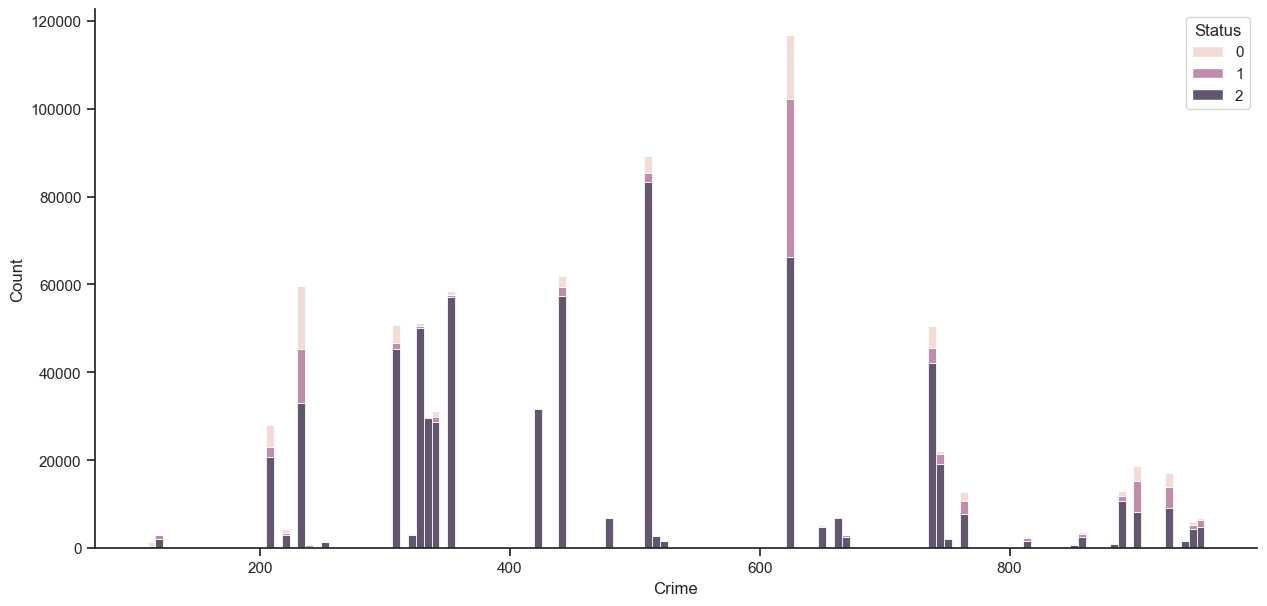

In [5]:
# Set the seaborn theme to "ticks"
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(15,7))

sns.despine(f)
sns.histplot(df, x="Crm Cd", hue="Status", multiple="stack",)

plt.xlabel('Crime')

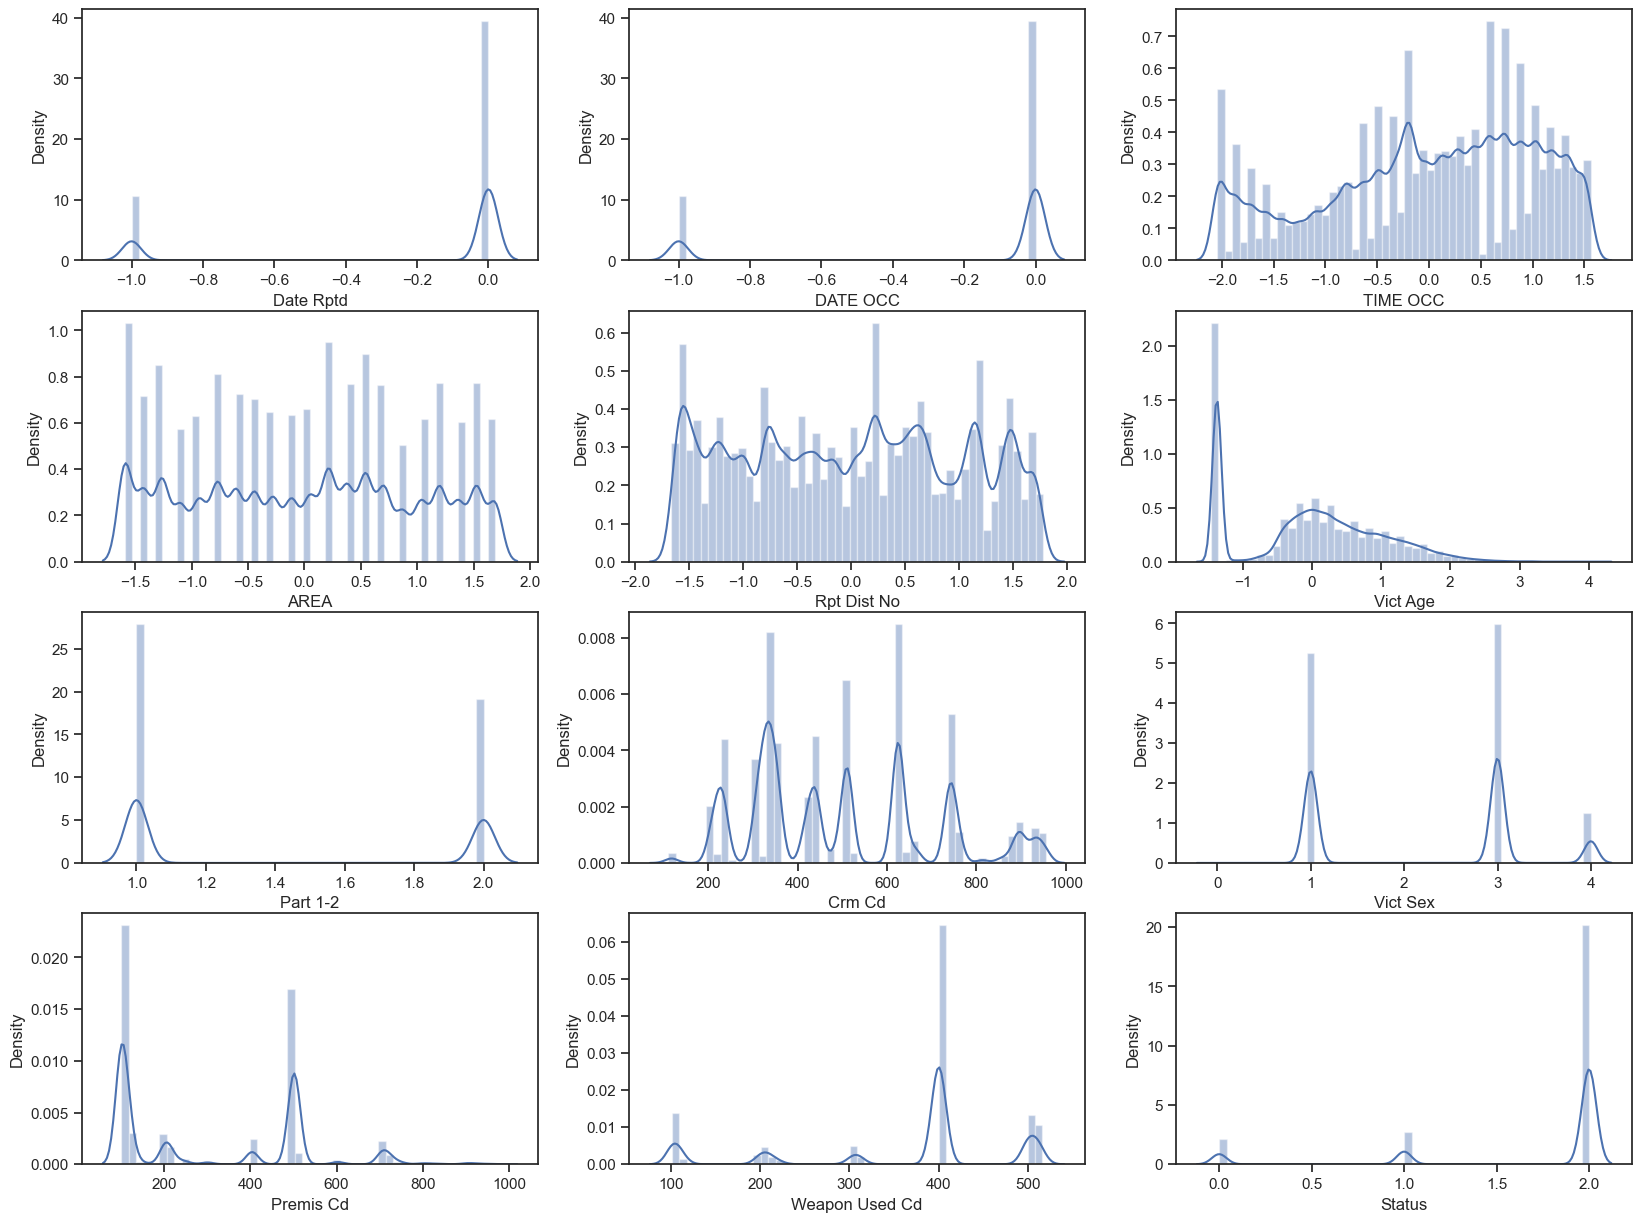

In [6]:
# Get the columns of the 'Water_Indexing_data' DataFrame.
columns = df.columns

# Set the figure size of the plot to 20x15 inches.
plt.figure(figsize=(20, 15))

# Iterate over the columns and create subplots for each one.
for i, col in enumerate(columns):
    # Create a subplot with 4 rows and 3 columns; 'i+1' specifies the position of the current subplot.
    plt.subplot(4, 3, i+1)

    # Create a distribution plot (histogram) for the current column using seaborn.
    sns.distplot(df[col])

In [7]:
# x=df.iloc[:,:-1]
# y=df.iloc[:,-1]
# # Import the train_test_split function from scikit-learn
# from sklearn.model_selection import train_test_split

# # Split the data into training and testing sets
# # 'test_size=0.2' specifies that 20% of the data will be used for testing, and 80% for training
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

# # Import the RandomForestClassifier from scikit-learn.
# from sklearn.ensemble import RandomForestClassifier

# # Create an instance of the RandomForestClassifier.
# model = RandomForestClassifier()

# # Import the RandomizedSearchCV from scikit-learn
# from sklearn.model_selection import RandomizedSearchCV

# # Define a dictionary of hyperparameter values to search over
# random_param = {'n_estimators': [100, 200, 300, 400], 'max_depth': [10, 20, 30, 40]}

# # Create an instance of RandomizedSearchCV
# # 'model' is the RandomForestClassifier created earlier
# # 'param_distributions' is set to 'random_param', which defines the hyperparameter search space
# # 'verbose=0' means no output during the search
# # 'n_jobs=-2' uses all available CPU cores except one for parallel computation
# random_grid_search_cv = RandomizedSearchCV(model, random_param, verbose=0)

# # Fit the RandomizedSearchCV to the training data
# random_grid_search_cv.fit(x_train, y_train)

# # Get the best hyperparameters found by the RandomizedSearchCV
# best_params = random_grid_search_cv.best_params_

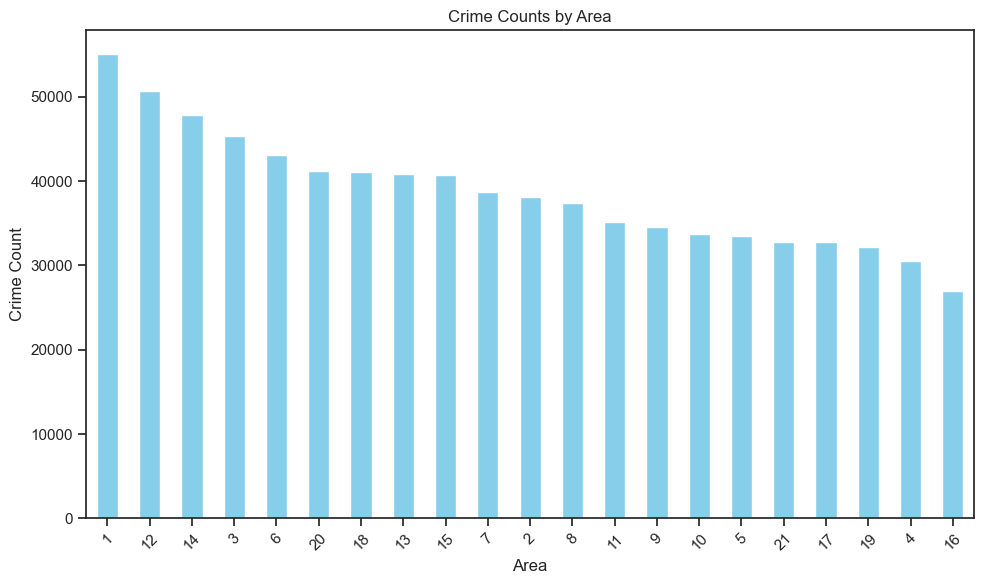

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'AREA' column contains area information and 'Crm Cd' column contains crime codes
# Replace 'data' with your DataFrame variable containing the dataset

# Grouping data by 'AREA NAME' and counting occurrences of each area
area_crime_counts = df['AREA'].value_counts()

# Plotting crime counts by area using a bar chart
plt.figure(figsize=(10, 6))
area_crime_counts.plot(kind='bar', color='skyblue')
plt.title('Crime Counts by Area')
plt.xlabel('Area')
plt.ylabel('Crime Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



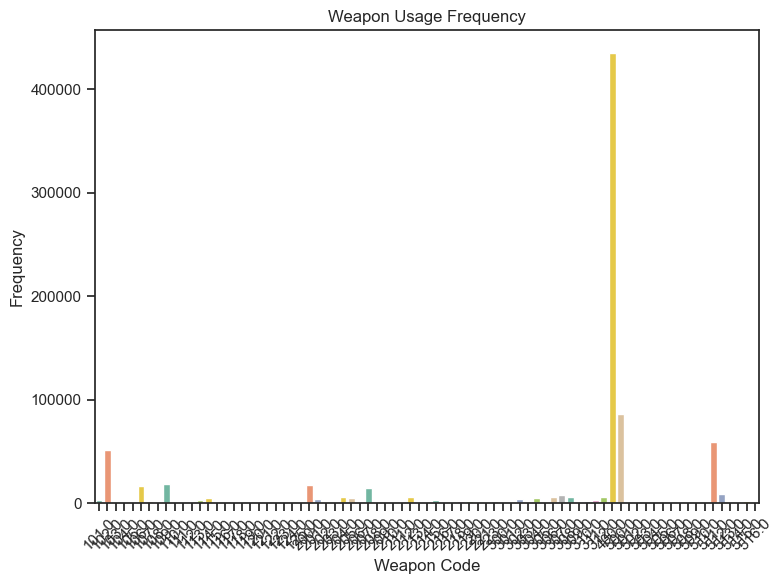

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Weapon Used Cd' contains weapon information
# Replace 'data' with your DataFrame variable containing the dataset

# Plotting weapon usage frequency using a count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Weapon Used Cd', palette='Set2')
plt.title('Weapon Usage Frequency')
plt.xlabel('Weapon Code')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

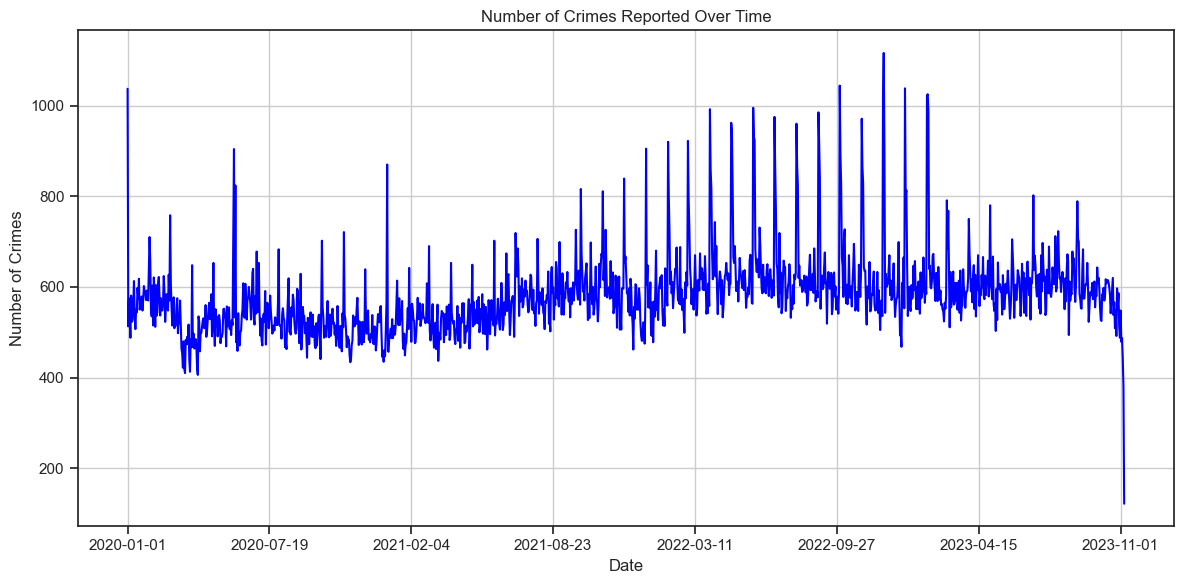

In [21]:
# Grouping data by 'DATE OCC' and counting occurrences to get the number of crimes per day
crime_counts_per_day = df.groupby('DATE OCC').size()

# Plotting the time series of crime counts over time
plt.figure(figsize=(12, 6))
crime_counts_per_day.plot(color='blue')
plt.title('Number of Crimes Reported Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.tight_layout()
plt.show()

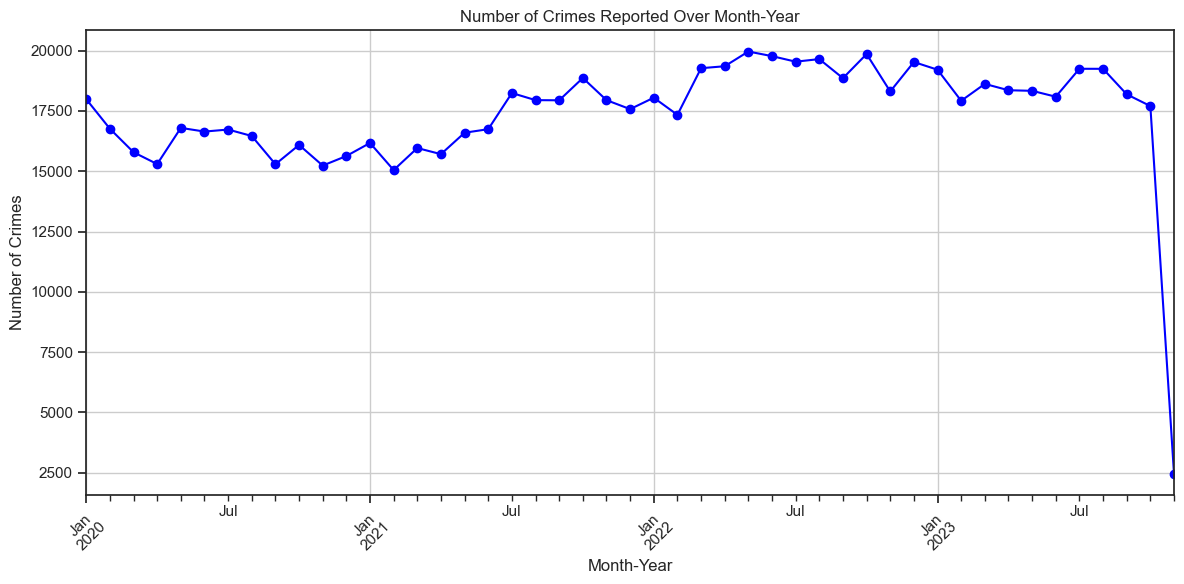

In [24]:
# Convert 'DATE OCC' to datetime format if it's not already in datetime format
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

# Extracting the month and year from the 'DATE OCC' column
df['Year_Month'] = df['DATE OCC'].dt.to_period('M')

# Grouping data by 'Year_Month' and counting occurrences to get the number of crimes per month-year combo
crime_counts_per_month_year = df.groupby('Year_Month').size()

# Plotting the time series of crime counts over month-year combos
plt.figure(figsize=(12, 6))
crime_counts_per_month_year.plot(color='blue', marker='o', linestyle='-')
plt.title('Number of Crimes Reported Over Month-Year')
plt.xlabel('Month-Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

2    655545
1     87196
0     69620
Name: Status, dtype: int64


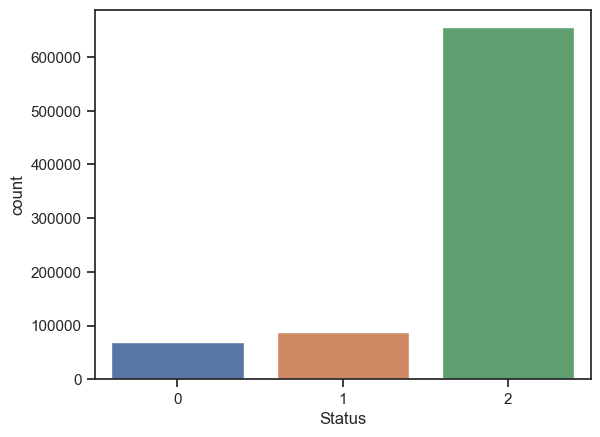

In [10]:
print(df['Status'].value_counts())

sns.countplot(x=df['Status']);

2    655545
1    655545
0    655545
Name: Status, dtype: int64


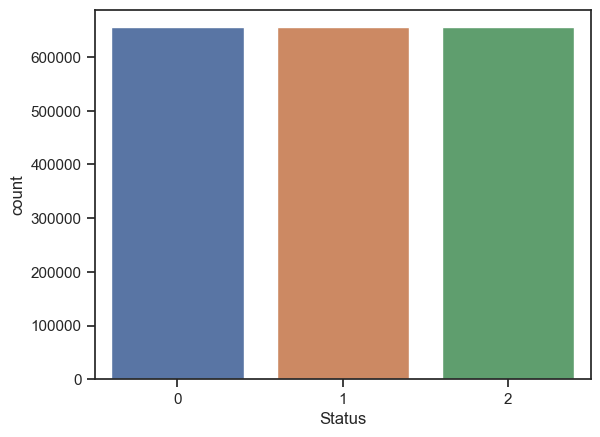

In [11]:
from imblearn.over_sampling import SMOTE

X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, Y)

X=pd.DataFrame(X_resampled)
Y=pd.DataFrame(y_resampled,columns=['Status'])

X.reset_index(drop=True,inplace=True)
Y.reset_index(drop=True,inplace=True)

df=pd.concat([X, Y],axis=1)
print(df['Status'].value_counts())

sns.countplot(x=df['Status']);